In [6]:
#『詳解ディープラーニング』より引用のロジスティック回帰コード（多クラス分類　keras.ver）の解説メモ　自分用
#利用環境
#keras-2.0.5 numpy-1.13.0 scipy-0.19.1 theano-0.9.0

In [2]:
import numpy as np
from sklearn.utils import shuffle

In [3]:
M = 2
K = 3
n = 100
N = n * K
X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])
Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])
X = np.concatenate((X1, X2, X3), axis = 0)
Y = np.concatenate((Y1, Y2, Y3), axis = 0)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/enc/.pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


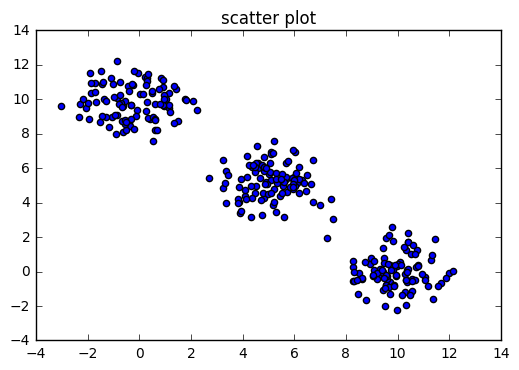

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0],X[:,1])
ax.set_title('scatter plot')
fig.show()

In [7]:
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.models import Sequential
from keras.optimizers import SGD

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(input_dim=M, units=K))

In [14]:
#↑二値問題ロジスティック回帰の場合のとき→model.add(Dense(input_dim=2, units=1))：インプットの回路数が2からM　ユニット数が１からKになっている

In [11]:
model.add(Activation('softmax'))

In [13]:
#↑二値問題ロジスティック回帰の場合のとき→model.add(Activation('sigmoid'))：sigmoidからsoftmaxになっている

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1))

In [16]:
#↑二値問題ロジスティック回帰の場合のとき→model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
#binary_crossentropy→categorical_crossentropy になっている

In [17]:
minibatch_size = 50

In [23]:
#↑↓ミニバッチ学習で最適化している

In [18]:
model.fit(X, Y, epochs=20, batch_size=minibatch_size)

Epoch 1/20
300/300 [==============================] - 0s - loss: 1.4148     
Epoch 2/20
300/300 [==============================] - 0s - loss: 0.2260     
Epoch 3/20
300/300 [==============================] - 0s - loss: 0.1580     
Epoch 4/20
300/300 [==============================] - 0s - loss: 0.1182     
Epoch 5/20
300/300 [==============================] - 0s - loss: 0.0999     
Epoch 6/20
300/300 [==============================] - 0s - loss: 0.0817     
Epoch 7/20
300/300 [==============================] - 0s - loss: 0.0716     
Epoch 8/20
300/300 [==============================] - 0s - loss: 0.0642     
Epoch 9/20
300/300 [==============================] - 0s - loss: 0.0585     
Epoch 10/20
300/300 [==============================] - 0s - loss: 0.0534     
Epoch 11/20
300/300 [==============================] - 0s - loss: 0.0498     
Epoch 12/20
300/300 [==============================] - 0s - loss: 0.0470     
Epoch 13/20
300/300 [==============================] - 0s - loss: 0.0436 

In [21]:
X_, Y_ = shuffle(X, Y)

classified = model.predict_classes(
    X_[0:10],
    batch_size=minibatch_size
    )

probability = model.predict_proba(
    X_[0:10],
    batch_size=1
    )

print('classified:')
print(classified)
print(np.argmax(model.predict(X_[0:10]), axis=1) == classified)
print()
print('output probability:')
print(probability)

 1/10 [==>...........................] - ETA: 0sclassified:
[2 2 2 0 0 1 2 0 1 0]
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[  5.32913447e-08   8.10188428e-03   9.91898060e-01]
 [  1.62625415e-08   2.37747859e-02   9.76225138e-01]
 [  1.09865908e-07   2.68083028e-02   9.73191619e-01]
 [  9.55868483e-01   4.41315807e-02   4.55532394e-08]
 [  9.91713762e-01   8.28626007e-03   3.51079477e-09]
 [  9.38163791e-03   8.98575664e-01   9.20426846e-02]
 [  1.45099479e-08   1.40904421e-02   9.85909522e-01]
 [  9.90424216e-01   9.57574695e-03   5.81202002e-08]
 [  4.96198377e-03   9.86497819e-01   8.54018703e-03]
 [  9.96361077e-01   3.63898184e-03   4.02196987e-09]]


In [22]:
#すべて正解となっているOK